# Chapter 4: Geometric Aspects of Linear Algebra

**Before Class**:
* Read Chapter 4 in Savov (2020) and take notes
* Watch the following videos and take notes:
  * [Nonsquare matrices as transformations between dimensions](https://www.3blue1brown.com/lessons/nonsquare-matrices)
  * [Dot products and duality](https://www.3blue1brown.com/lessons/dot-products)
  * [Cross products](https://www.3blue1brown.com/lessons/cross-products)
* Compile a list of questions to bring to class

**During and After Class**:
* Take notes (on paper or a tablet computer)
* Complete this notebook, submit you answer via Gradescope

In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt

## Visualize Linear System in 3D

[[(3.0, -3.0, -6.0), (3.0, 3.0, 0.0), (-3.0, -3.0, 0.0), (-3.0, 3.0, 6.0)]]
[[(3.0, -3.0, -8.0), (3.0, 3.0, -2.0), (-3.0, -3.0, 4.0), (-3.0, 3.0, 10.0)]]


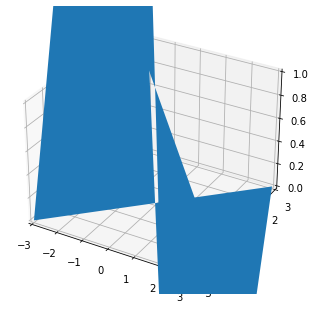

In [18]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def visualize_linear_system(A, b, xlim=(-3,3), ylim=(-3,3)):
    """ Visualize rows of linear system as planes in 3D
    
    Arguments:
        A: N x 3 matrix
        B: N x 1 vector
        xlim: tuple of bounds for x dimension
        ylim: tuple of bounds for y dimension
    """

    assert A.shape[1] == 3, "Matrix A must have 3 columns"
    assert A.shape[0] == len(b), "Matrix A and vector b must have the same number of rows"

    N = len(b)

    # Find vertices of planes to plot using xlim and ylim
    x = np.zeros(4)
    y = np.zeros(4)
    for i in range(2):
        for j in range(2):
            x[2*(i-1) + j] = xlim[i]
            y[2*(i-1) + j] = ylim[j]

    # Create empty plot
    fig = plt.figure()
    ax = Axes3D(fig, auto_add_to_figure=False)
    fig.add_axes(ax)

    # Loop over equations
    for i in range(N):

        # Create a grid of points for plotting
        # X, Y = np.meshgrid(np.linspace(xlim[0],xlim[1],5), np.linspace(ylim[0],ylim[1],5))

        func_z = lambda x,y : (b[i] - A[i,0]*x + A[i,1]*y)/A[i,2]
        z = np.zeros(4)
        for j in range(4):
            z[j] = func_z(x[j],y[j])

        verts = [list(zip(x,y,z))]

        print(verts)

        ax.add_collection3d(Poly3DCollection(verts))

    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()

        
A = np.array([[1,1,1],[2,1,1]])
b = np.array([0, 1])

visualize_linear_system(A, b)

[[-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]
 [-2. -1.  0.  1.  2.]]
[[-2. -2. -2. -2. -2.]
 [-1. -1. -1. -1. -1.]
 [ 0.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  1.]
 [ 2.  2.  2.  2.  2.]]


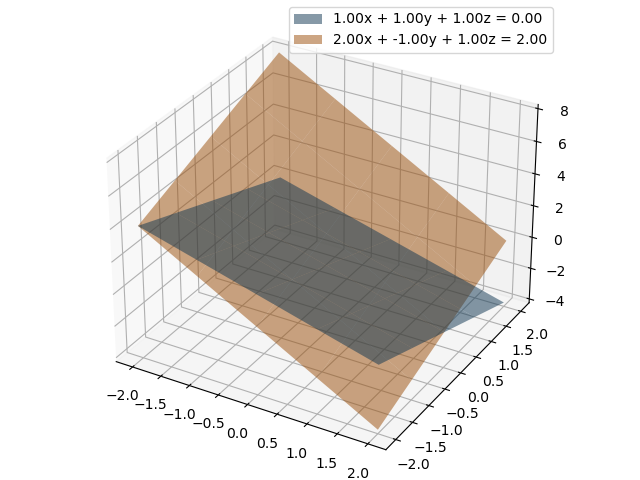

In [8]:
from mpl_toolkits.mplot3d import Axes3D

def visualize_linear_system(A, b, xlim=(-2,2), ylim=(-2,2)):
    """ Visualize rows of linear system as planes in 3D
    
    Arguments:
        A: N x 3 matrix
        B: N x 1 vector
        xlim: tuple of bounds for x dimension
        ylim: tuple of bounds for y dimension
    """

    assert A.shape[1] == 3, "Matrix A must have 3 columns"
    assert A.shape[0] == len(b), "Matrix A and vector b must have the same number of rows"

    N = len(b)

    # Create empty plot
    fig = plt.figure()
    ax = Axes3D(fig, auto_add_to_figure=False)
    fig.add_axes(ax)

    # Create a grid of points for plotting
    X, Y = np.meshgrid(np.linspace(xlim[0],xlim[1],5), np.linspace(ylim[0],ylim[1],5))

    print(X)
    print(Y)

    # Loop over equations
    for i in range(N):

        # Define function to calculate z
        func_z = lambda x,y : (b[i] - A[i,0]*x - A[i,1]*y)/A[i,2]
        Z = func_z(X, Y)

        s = "{0:.2f}x + {1:.2f}y + {2:.2f}z = {3:.2f}".format(A[i,0], A[i,1], A[i,2], b[i])
        surf = ax.plot_surface(X, Y, Z, alpha=0.5, label=s)

        # Needed for a legend
        # https://stackoverflow.com/questions/27449109/adding-legend-to-a-surface-plot
        surf._edgecolors2d = surf._edgecolor3d
        surf._facecolors2d = surf._facecolor3d

    plt.legend()
    plt.show()

        
A = np.array([[1,1,1],[2,-1,1]])
b = np.array([0, 2])

visualize_linear_system(A, b)